In [104]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import torch
from torch import autograd

In [105]:
#Problem B1: Explain Numpy based code

#Generate 10 training examples and a constant add bias to the X matrix
N=10 #number of training examples
a_true = 4.0 #value of the true slope
b_true = 3.0 #value of the true intercept

X = 2 * np.random.rand(N, 1) #generate 10 random numbers for X values
y = a_true*X + b_true #compute the value of y using the X values and the values of a & b
X_b=np.column_stack([np.ones((N, 1)), X]) # add x0 = 1 to each instance as first column

eta = 0.1 # learning rate
n_iterations = 300 #number of iterations

a0 = 1.0 #starting guess of a
b0 = 1.0 #starting guess of b
w = np.array([[b0],[a0]]) # np.random.randn(2,1) # random initialization
for iteration in range(n_iterations): #looping over the number of iterations
  grad = 2/N * X_b.T.dot(X_b.dot(w) - y) #computing the gradient of the cost function (sum of least sequares)
  w = w - eta * grad #computing the updated value of the parameter vectore (w)

#print the optimal value of w
w_from_np=w
print(w_from_np)

[[3.00000158]
 [3.99999807]]


In [106]:
#Problem B2: Explain PyTorch based code

N=10  #number of training examples
a_true = 4.0  #value of the true slope
b_true = 3.0  #value of the true intercept

X = 2 * torch.randn(N, 1) #generate 10 random numbers for X values
y_obs = a_true*X + b_true #compute the values of y using X values and the true values of a & b

def my_linear_model(X, w): #This function computes the predicted values of y 
  a = w[0]                 #given X values and estimated parameter values (w)
  b = w[1]
  return a*X + b

def my_l2_loss_function(y_pred, y_true): #This function computes the loss function
  return torch.pow(y_true - y_pred, 2.0) #the values of individtual errors between 
                                         #the true and the predicted values of y


def my_cost_function(y_pred, y_true):    #This function computes the cost function
  loss_over_data = my_l2_loss_function(y_pred, y_true) #The average of the loss function
  return torch.mean(loss_over_data)

eta = 0.01 # learning rate aka step-size
n_iterations = 300 # Nr. GD iterations

#create a tensor with random starting values for the parameters (w)
w_pt = torch.randn(size=[2], requires_grad=True) # Param Init

for iteration_i in range(n_iterations): #looping over the number of iterations
  y_preds = my_linear_model(X, w_pt) #compute the predicted y values 

  cost = my_cost_function(y_preds, y_obs) #compute the cost function using the 
                                          #observed and the predicted values of y

  cost.backward() #apply auto-differentiation at cost function using the autograd engine

  with torch.no_grad():
    #compute the updated value of x
    w_pt -= eta*w_pt.grad

  w_pt.grad.zero_()

#print the optimal value of w
w_from_PyTorch = w_pt.detach().numpy()
w_from_PyTorch

array([3.9982157, 2.9915895], dtype=float32)

Problem B3: Compare Numpy and PyTorch based results

Both Numpy and PyTorch yields similar results that are close to the original model except that a & b are flipped in the Numpy vectore (w)

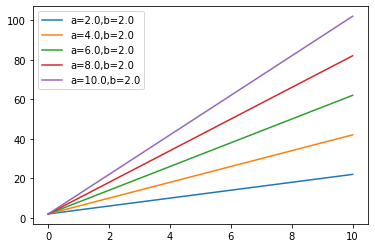

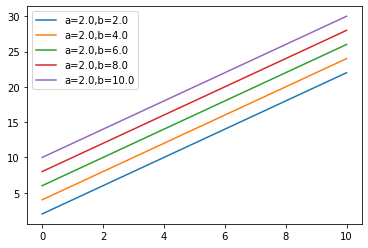

In [107]:
#Problem C1: Make one graph per parameter for models 1-7
#model 1

def model_linear (x,w):
  a = w[0]
  b = w[1]
  fx = a*x+b
  return fx

#create a tensor with the values we want to evaluate
xt = torch.linspace(start=0, end=10, steps=100)

w1 = torch.tensor([2.0,2.0], requires_grad=True)
w2 = torch.tensor([4.0,2.0], requires_grad=True)
w3 = torch.tensor([6.0,2.0], requires_grad=True)
w4 = torch.tensor([8.0,2.0], requires_grad=True)
w5 = torch.tensor([10.0,2.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_linear(xt,w1)
y_pred2 = model_linear(xt,w2)
y_pred3 = model_linear(xt,w3)
y_pred4 = model_linear(xt,w4)
y_pred5 = model_linear(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a={w1[0]},b={w1[1]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a={w2[0]},b={w2[1]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a={w3[0]},b={w3[1]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a={w4[0]},b={w4[1]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a={w5[0]},b={w5[1]}')
plt.legend()
plt.show()

w1 = torch.tensor([2.0,2.0], requires_grad=True)
w2 = torch.tensor([2.0,4.0], requires_grad=True)
w3 = torch.tensor([2.0,6.0], requires_grad=True)
w4 = torch.tensor([2.0,8.0], requires_grad=True)
w5 = torch.tensor([2.0,10.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_linear(xt,w1)
y_pred2 = model_linear(xt,w2)
y_pred3 = model_linear(xt,w3)
y_pred4 = model_linear(xt,w4)
y_pred5 = model_linear(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a={w1[0]},b={w1[1]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a={w2[0]},b={w2[1]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a={w3[0]},b={w3[1]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a={w4[0]},b={w4[1]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a={w5[0]},b={w5[1]}')
plt.legend()
plt.show()

a changes the slope of the curve. 
b changes the intercept point. 

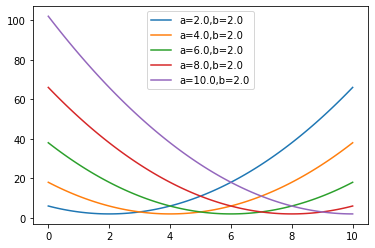

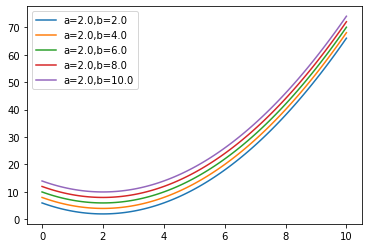

In [108]:
#model 2

def model_quadratic (x,w):
  a = w[0]
  b = w[1]
  fx = torch.pow(x-a,2)+b
  return fx

#create a tensor with the values we want to evaluate
xt = torch.linspace(start=0, end=10, steps=100)

w1 = torch.tensor([2.0,2.0], requires_grad=True)
w2 = torch.tensor([4.0,2.0], requires_grad=True)
w3 = torch.tensor([6.0,2.0], requires_grad=True)
w4 = torch.tensor([8.0,2.0], requires_grad=True)
w5 = torch.tensor([10.0,2.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_quadratic(xt,w1)
y_pred2 = model_quadratic(xt,w2)
y_pred3 = model_quadratic(xt,w3)
y_pred4 = model_quadratic(xt,w4)
y_pred5 = model_quadratic(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a={w1[0]},b={w1[1]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a={w2[0]},b={w2[1]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a={w3[0]},b={w3[1]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a={w4[0]},b={w4[1]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a={w5[0]},b={w5[1]}')
plt.legend()
plt.show()

w1 = torch.tensor([2.0,2.0], requires_grad=True)
w2 = torch.tensor([2.0,4.0], requires_grad=True)
w3 = torch.tensor([2.0,6.0], requires_grad=True)
w4 = torch.tensor([2.0,8.0], requires_grad=True)
w5 = torch.tensor([2.0,10.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_quadratic(xt,w1)
y_pred2 = model_quadratic(xt,w2)
y_pred3 = model_quadratic(xt,w3)
y_pred4 = model_quadratic(xt,w4)
y_pred5 = model_quadratic(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a={w1[0]},b={w1[1]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a={w2[0]},b={w2[1]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a={w3[0]},b={w3[1]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a={w4[0]},b={w4[1]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a={w5[0]},b={w5[1]}')
plt.legend()
plt.show()


a controls the shape of the parabola and whether it is upwaqrd or downward  
b controls the location of the vertex

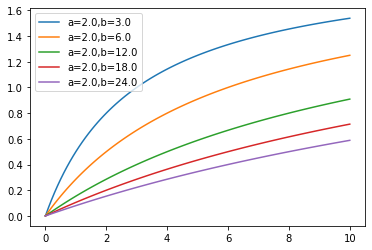

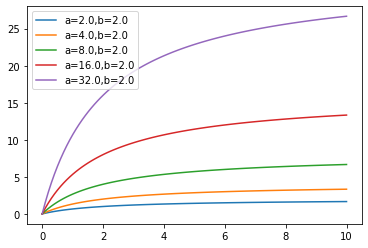

In [109]:
#model 3

def model_michaelis_menten (x,w):
  a = w[0]
  b = w[1]
  fx = (a*x)/(b+x)
  return fx

#create a tensor with the values we want to evaluate
xt = torch.linspace(start=0, end=10, steps=100)

w1 = torch.tensor([2.0,3.0], requires_grad=True)
w2 = torch.tensor([2.0,6.0], requires_grad=True)
w3 = torch.tensor([2.0,12.0], requires_grad=True)
w4 = torch.tensor([2.0,18.0], requires_grad=True)
w5 = torch.tensor([2.0,24.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_michaelis_menten(xt,w1)
y_pred2 = model_michaelis_menten(xt,w2)
y_pred3 = model_michaelis_menten(xt,w3)
y_pred4 = model_michaelis_menten(xt,w4)
y_pred5 = model_michaelis_menten(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a={w1[0]},b={w1[1]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a={w2[0]},b={w2[1]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a={w3[0]},b={w3[1]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a={w4[0]},b={w4[1]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a={w5[0]},b={w5[1]}')
plt.legend()
plt.show()

w1 = torch.tensor([2.0,2.0], requires_grad=True)
w2 = torch.tensor([4.0,2.0], requires_grad=True)
w3 = torch.tensor([8.0,2.0], requires_grad=True)
w4 = torch.tensor([16.0,2.0], requires_grad=True)
w5 = torch.tensor([32.0,2.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_michaelis_menten(xt,w1)
y_pred2 = model_michaelis_menten(xt,w2)
y_pred3 = model_michaelis_menten(xt,w3)
y_pred4 = model_michaelis_menten(xt,w4)
y_pred5 = model_michaelis_menten(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a={w1[0]},b={w1[1]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a={w2[0]},b={w2[1]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a={w3[0]},b={w3[1]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a={w4[0]},b={w4[1]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a={w5[0]},b={w5[1]}')
plt.legend()
plt.show()

a controls the extent on the y axis 

b controls the shape of the curve (whether it is a curve or a straight line)

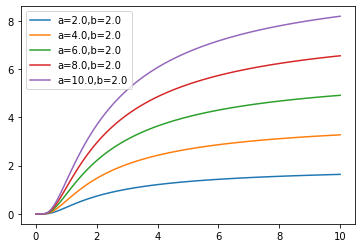

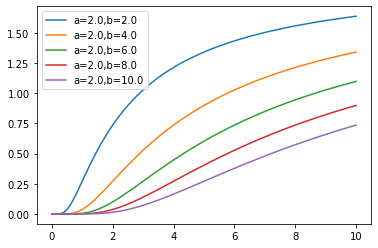

In [110]:
#model 4

def model_arrhenius (x,w):
  a = w[0]
  b = w[1]
  fx = a*torch.exp(-b/x)
  return fx

#create a tensor with the values we want to evaluate
xt = torch.linspace(start=0, end=10, steps=100)

w1 = torch.tensor([2.0,2.0], requires_grad=True)
w2 = torch.tensor([4.0,2.0], requires_grad=True)
w3 = torch.tensor([6.0,2.0], requires_grad=True)
w4 = torch.tensor([8.0,2.0], requires_grad=True)
w5 = torch.tensor([10.0,2.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_arrhenius(xt,w1)
y_pred2 = model_arrhenius(xt,w2)
y_pred3 = model_arrhenius(xt,w3)
y_pred4 = model_arrhenius(xt,w4)
y_pred5 = model_arrhenius(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a={w1[0]},b={w1[1]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a={w2[0]},b={w2[1]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a={w3[0]},b={w3[1]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a={w4[0]},b={w4[1]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a={w5[0]},b={w5[1]}')
plt.legend()
plt.show()

w1 = torch.tensor([2.0,2.0], requires_grad=True)
w2 = torch.tensor([2.0,4.0], requires_grad=True)
w3 = torch.tensor([2.0,6.0], requires_grad=True)
w4 = torch.tensor([2.0,8.0], requires_grad=True)
w5 = torch.tensor([2.0,10.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_arrhenius(xt,w1)
y_pred2 = model_arrhenius(xt,w2)
y_pred3 = model_arrhenius(xt,w3)
y_pred4 = model_arrhenius(xt,w4)
y_pred5 = model_arrhenius(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a={w1[0]},b={w1[1]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a={w2[0]},b={w2[1]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a={w3[0]},b={w3[1]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a={w4[0]},b={w4[1]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a={w5[0]},b={w5[1]}')
plt.legend()
plt.show()

a controls the shift (the exten of the curve on the y axis)

b controls the shape of the curve 

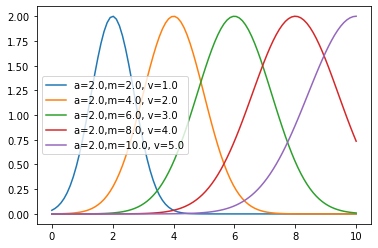

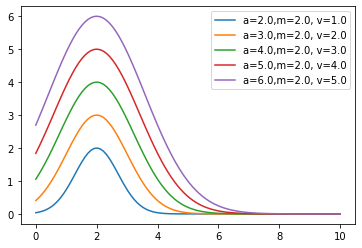

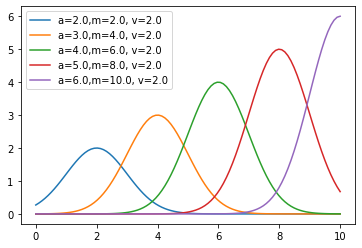

In [111]:
#model 5

def model_bell_curve (x,w):
  a = w[0]
  m = w[1]
  v = w[2]
  fx = a*torch.exp(-(torch.pow(x-m,2))/v)
  return fx

#create a tensor with the values we want to evaluate
xt = torch.linspace(start=0, end=10, steps=100)

w1 = torch.tensor([2.0,2.0,1.0], requires_grad=True)
w2 = torch.tensor([2.0,4.0,2.0], requires_grad=True)
w3 = torch.tensor([2.0,6.0,3.0], requires_grad=True)
w4 = torch.tensor([2.0,8.0,4.0], requires_grad=True)
w5 = torch.tensor([2.0,10.0,5.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_bell_curve(xt,w1)
y_pred2 = model_bell_curve(xt,w2)
y_pred3 = model_bell_curve(xt,w3)
y_pred4 = model_bell_curve(xt,w4)
y_pred5 = model_bell_curve(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a={w1[0]},m={w1[1]}, v={w1[2]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a={w2[0]},m={w2[1]}, v={w2[2]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a={w3[0]},m={w3[1]}, v={w3[2]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a={w4[0]},m={w4[1]}, v={w4[2]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a={w5[0]},m={w5[1]}, v={w5[2]}')
plt.legend()
plt.show()

w1 = torch.tensor([2.0,2.0,1.0], requires_grad=True)
w2 = torch.tensor([3.0,2.0,2.0], requires_grad=True)
w3 = torch.tensor([4.0,2.0,3.0], requires_grad=True)
w4 = torch.tensor([5.0,2.0,4.0], requires_grad=True)
w5 = torch.tensor([6.0,2.0,5.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_bell_curve(xt,w1)
y_pred2 = model_bell_curve(xt,w2)
y_pred3 = model_bell_curve(xt,w3)
y_pred4 = model_bell_curve(xt,w4)
y_pred5 = model_bell_curve(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a={w1[0]},m={w1[1]}, v={w1[2]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a={w2[0]},m={w2[1]}, v={w2[2]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a={w3[0]},m={w3[1]}, v={w3[2]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a={w4[0]},m={w4[1]}, v={w4[2]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a={w5[0]},m={w5[1]}, v={w5[2]}')
plt.legend()
plt.show()

w1 = torch.tensor([2.0,2.0,2.0], requires_grad=True)
w2 = torch.tensor([3.0,4.0,2.0], requires_grad=True)
w3 = torch.tensor([4.0,6.0,2.0], requires_grad=True)
w4 = torch.tensor([5.0,8.0,2.0], requires_grad=True)
w5 = torch.tensor([6.0,10.0,2.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_bell_curve(xt,w1)
y_pred2 = model_bell_curve(xt,w2)
y_pred3 = model_bell_curve(xt,w3)
y_pred4 = model_bell_curve(xt,w4)
y_pred5 = model_bell_curve(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a={w1[0]},m={w1[1]}, v={w1[2]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a={w2[0]},m={w2[1]}, v={w2[2]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a={w3[0]},m={w3[1]}, v={w3[2]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a={w4[0]},m={w4[1]}, v={w4[2]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a={w5[0]},m={w5[1]}, v={w5[2]}')
plt.legend()
plt.show()

a controls the peak value 

m controls the location of the vertex 

v controls the width 

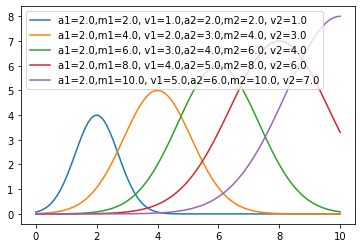

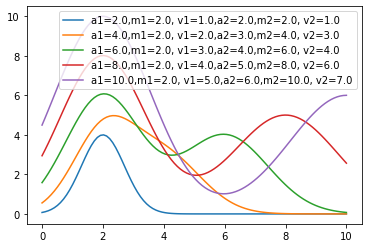

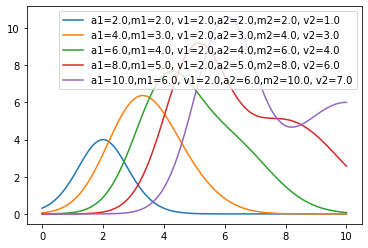

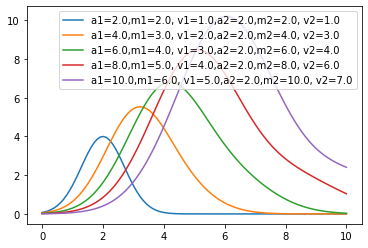

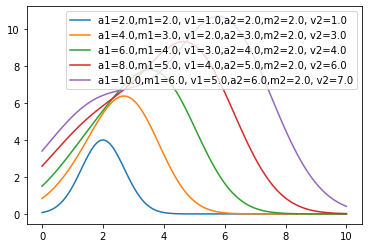

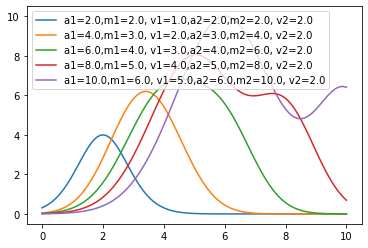

In [112]:
#model 6

def model_bimodal (x,w):
  a1 = w[0]
  m1 = w[1]
  v1 = w[2]
  a2 = w[3]
  m2 = w[4]
  v2 = w[5]
  fx = a1*torch.exp(-(torch.pow(x-m1,2))/v1)+a2*torch.exp(-(torch.pow(x-m2,2))/v2)
  return fx

#create a tensor with the values we want to evaluate
xt = torch.linspace(start=0, end=10, steps=100)

w1 = torch.tensor([2.0,2.0,1.0,2.0,2.0,1.0], requires_grad=True)
w2 = torch.tensor([2.0,4.0,2.0,3.0,4.0,3.0], requires_grad=True)
w3 = torch.tensor([2.0,6.0,3.0,4.0,6.0,4.0], requires_grad=True)
w4 = torch.tensor([2.0,8.0,4.0,5.0,8.0,6.0], requires_grad=True)
w5 = torch.tensor([2.0,10.0,5.0,6.0,10.0,7.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_bimodal(xt,w1)
y_pred2 = model_bimodal(xt,w2)
y_pred3 = model_bimodal(xt,w3)
y_pred4 = model_bimodal(xt,w4)
y_pred5 = model_bimodal(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a1={w1[0]},m1={w1[1]}, v1={w1[2]},a2={w1[3]},m2={w1[4]}, v2={w1[5]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a1={w2[0]},m1={w2[1]}, v1={w2[2]},a2={w2[3]},m2={w2[4]}, v2={w2[5]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a1={w3[0]},m1={w3[1]}, v1={w3[2]},a2={w3[3]},m2={w3[4]}, v2={w3[5]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a1={w4[0]},m1={w4[1]}, v1={w4[2]},a2={w4[3]},m2={w4[4]}, v2={w4[5]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a1={w5[0]},m1={w5[1]}, v1={w5[2]},a2={w5[3]},m2={w5[4]}, v2={w5[5]}')
plt.legend()
plt.show()

w1 = torch.tensor([2.0,2.0,1.0,2.0,2.0,1.0], requires_grad=True)
w2 = torch.tensor([4.0,2.0,2.0,3.0,4.0,3.0], requires_grad=True)
w3 = torch.tensor([6.0,2.0,3.0,4.0,6.0,4.0], requires_grad=True)
w4 = torch.tensor([8.0,2.0,4.0,5.0,8.0,6.0], requires_grad=True)
w5 = torch.tensor([10.0,2.0,5.0,6.0,10.0,7.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_bimodal(xt,w1)
y_pred2 = model_bimodal(xt,w2)
y_pred3 = model_bimodal(xt,w3)
y_pred4 = model_bimodal(xt,w4)
y_pred5 = model_bimodal(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a1={w1[0]},m1={w1[1]}, v1={w1[2]},a2={w1[3]},m2={w1[4]}, v2={w1[5]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a1={w2[0]},m1={w2[1]}, v1={w2[2]},a2={w2[3]},m2={w2[4]}, v2={w2[5]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a1={w3[0]},m1={w3[1]}, v1={w3[2]},a2={w3[3]},m2={w3[4]}, v2={w3[5]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a1={w4[0]},m1={w4[1]}, v1={w4[2]},a2={w4[3]},m2={w4[4]}, v2={w4[5]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a1={w5[0]},m1={w5[1]}, v1={w5[2]},a2={w5[3]},m2={w5[4]}, v2={w5[5]}')
plt.legend()
plt.show()

w1 = torch.tensor([2.0,2.0,2.0,2.0,2.0,1.0], requires_grad=True)
w2 = torch.tensor([4.0,3.0,2.0,3.0,4.0,3.0], requires_grad=True)
w3 = torch.tensor([6.0,4.0,2.0,4.0,6.0,4.0], requires_grad=True)
w4 = torch.tensor([8.0,5.0,2.0,5.0,8.0,6.0], requires_grad=True)
w5 = torch.tensor([10.0,6.0,2.0,6.0,10.0,7.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_bimodal(xt,w1)
y_pred2 = model_bimodal(xt,w2)
y_pred3 = model_bimodal(xt,w3)
y_pred4 = model_bimodal(xt,w4)
y_pred5 = model_bimodal(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a1={w1[0]},m1={w1[1]}, v1={w1[2]},a2={w1[3]},m2={w1[4]}, v2={w1[5]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a1={w2[0]},m1={w2[1]}, v1={w2[2]},a2={w2[3]},m2={w2[4]}, v2={w2[5]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a1={w3[0]},m1={w3[1]}, v1={w3[2]},a2={w3[3]},m2={w3[4]}, v2={w3[5]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a1={w4[0]},m1={w4[1]}, v1={w4[2]},a2={w4[3]},m2={w4[4]}, v2={w4[5]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a1={w5[0]},m1={w5[1]}, v1={w5[2]},a2={w5[3]},m2={w5[4]}, v2={w5[5]}')
plt.legend()
plt.show()

w1 = torch.tensor([2.0,2.0,1.0,2.0,2.0,1.0], requires_grad=True)
w2 = torch.tensor([4.0,3.0,2.0,2.0,4.0,3.0], requires_grad=True)
w3 = torch.tensor([6.0,4.0,3.0,2.0,6.0,4.0], requires_grad=True)
w4 = torch.tensor([8.0,5.0,4.0,2.0,8.0,6.0], requires_grad=True)
w5 = torch.tensor([10.0,6.0,5.0,2.0,10.0,7.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_bimodal(xt,w1)
y_pred2 = model_bimodal(xt,w2)
y_pred3 = model_bimodal(xt,w3)
y_pred4 = model_bimodal(xt,w4)
y_pred5 = model_bimodal(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a1={w1[0]},m1={w1[1]}, v1={w1[2]},a2={w1[3]},m2={w1[4]}, v2={w1[5]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a1={w2[0]},m1={w2[1]}, v1={w2[2]},a2={w2[3]},m2={w2[4]}, v2={w2[5]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a1={w3[0]},m1={w3[1]}, v1={w3[2]},a2={w3[3]},m2={w3[4]}, v2={w3[5]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a1={w4[0]},m1={w4[1]}, v1={w4[2]},a2={w4[3]},m2={w4[4]}, v2={w4[5]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a1={w5[0]},m1={w5[1]}, v1={w5[2]},a2={w5[3]},m2={w5[4]}, v2={w5[5]}')
plt.legend()
plt.show()

w1 = torch.tensor([2.0,2.0,1.0,2.0,2.0,1.0], requires_grad=True)
w2 = torch.tensor([4.0,3.0,2.0,3.0,2.0,3.0], requires_grad=True)
w3 = torch.tensor([6.0,4.0,3.0,4.0,2.0,4.0], requires_grad=True)
w4 = torch.tensor([8.0,5.0,4.0,5.0,2.0,6.0], requires_grad=True)
w5 = torch.tensor([10.0,6.0,5.0,6.0,2.0,7.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_bimodal(xt,w1)
y_pred2 = model_bimodal(xt,w2)
y_pred3 = model_bimodal(xt,w3)
y_pred4 = model_bimodal(xt,w4)
y_pred5 = model_bimodal(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a1={w1[0]},m1={w1[1]}, v1={w1[2]},a2={w1[3]},m2={w1[4]}, v2={w1[5]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a1={w2[0]},m1={w2[1]}, v1={w2[2]},a2={w2[3]},m2={w2[4]}, v2={w2[5]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a1={w3[0]},m1={w3[1]}, v1={w3[2]},a2={w3[3]},m2={w3[4]}, v2={w3[5]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a1={w4[0]},m1={w4[1]}, v1={w4[2]},a2={w4[3]},m2={w4[4]}, v2={w4[5]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a1={w5[0]},m1={w5[1]}, v1={w5[2]},a2={w5[3]},m2={w5[4]}, v2={w5[5]}')
plt.legend()
plt.show()

w1 = torch.tensor([2.0,2.0,1.0,2.0,2.0,2.0], requires_grad=True)
w2 = torch.tensor([4.0,3.0,2.0,3.0,4.0,2.0], requires_grad=True)
w3 = torch.tensor([6.0,4.0,3.0,4.0,6.0,2.0], requires_grad=True)
w4 = torch.tensor([8.0,5.0,4.0,5.0,8.0,2.0], requires_grad=True)
w5 = torch.tensor([10.0,6.0,5.0,6.0,10.0,2.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_bimodal(xt,w1)
y_pred2 = model_bimodal(xt,w2)
y_pred3 = model_bimodal(xt,w3)
y_pred4 = model_bimodal(xt,w4)
y_pred5 = model_bimodal(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a1={w1[0]},m1={w1[1]}, v1={w1[2]},a2={w1[3]},m2={w1[4]}, v2={w1[5]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a1={w2[0]},m1={w2[1]}, v1={w2[2]},a2={w2[3]},m2={w2[4]}, v2={w2[5]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a1={w3[0]},m1={w3[1]}, v1={w3[2]},a2={w3[3]},m2={w3[4]}, v2={w3[5]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a1={w4[0]},m1={w4[1]}, v1={w4[2]},a2={w4[3]},m2={w4[4]}, v2={w4[5]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a1={w5[0]},m1={w5[1]}, v1={w5[2]},a2={w5[3]},m2={w5[4]}, v2={w5[5]}')
plt.legend()
plt.show()

a1 controls the shape

m1 controls the location of the vertex 

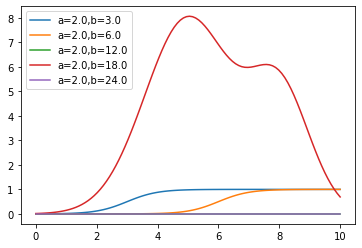

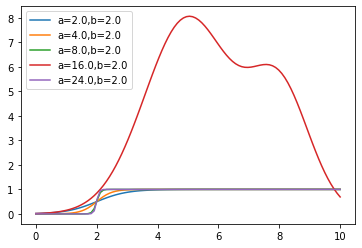

In [113]:
#model 7

def model_neuron (x,w):
  a = w[0]
  b = w[1]
  fx = 1/(1+torch.exp(-a*x+a*b))
  return fx

#create a tensor with the values we want to evaluate
xt = torch.linspace(start=0, end=10, steps=100)

w1 = torch.tensor([2.0,3.0], requires_grad=True)
w2 = torch.tensor([2.0,6.0], requires_grad=True)
w3 = torch.tensor([2.0,12.0], requires_grad=True)
w4 = torch.tensor([2.0,18.0], requires_grad=True)
w5 = torch.tensor([2.0,24.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_neuron(xt,w1)
y_pred2 = model_neuron(xt,w2)
y_pred3 = model_neuron(xt,w4)
y_pred5 = model_neuron(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a={w1[0]},b={w1[1]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a={w2[0]},b={w2[1]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a={w3[0]},b={w3[1]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a={w4[0]},b={w4[1]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a={w5[0]},b={w5[1]}')
plt.legend()
plt.show()

w1 = torch.tensor([2.0,2.0], requires_grad=True)
w2 = torch.tensor([4.0,2.0], requires_grad=True)
w3 = torch.tensor([8.0,2.0], requires_grad=True)
w4 = torch.tensor([16.0,2.0], requires_grad=True)
w5 = torch.tensor([24.0,2.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_neuron(xt,w1)
y_pred2 = model_neuron(xt,w2)
y_pred3 = model_neuron(xt,w4)
y_pred5 = model_neuron(xt,w5)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a={w1[0]},b={w1[1]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a={w2[0]},b={w2[1]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a={w3[0]},b={w3[1]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a={w4[0]},b={w4[1]}')
line5, = plt.plot(xt, y_pred5.detach().numpy(), label=f'a={w5[0]},b={w5[1]}')
plt.legend()
plt.show()


(-10.0, 10.0)

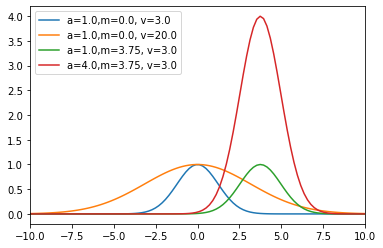

In [114]:
#Problem C2: Parameter guessing based on visual inspection
#model 5

def model_bell_curve (x,w):
  a = w[0]
  m = w[1]
  v = w[2]
  fx = a*torch.exp(-(torch.pow(x-m,2))/v)
  return fx

#create a tensor with the values we want to evaluate
xt = torch.linspace(start=-10, end=10, steps=100)

w1 = torch.tensor([1.0,0.0,3.0], requires_grad=True)
w2 = torch.tensor([1.0,0.0,20.0], requires_grad=True)
w3 = torch.tensor([1.0,3.75,3.0], requires_grad=True)
w4 = torch.tensor([4.0,3.75,3.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_bell_curve(xt,w1)
y_pred2 = model_bell_curve(xt,w2)
y_pred3 = model_bell_curve(xt,w3)
y_pred4 = model_bell_curve(xt,w4)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a={w1[0]},m={w1[1]}, v={w1[2]}')
line2, = plt.plot(xt, y_pred2.detach().numpy(), label=f'a={w2[0]},m={w2[1]}, v={w2[2]}')
line3, = plt.plot(xt, y_pred3.detach().numpy(), label=f'a={w3[0]},m={w3[1]}, v={w3[2]}')
line4, = plt.plot(xt, y_pred4.detach().numpy(), label=f'a={w4[0]},m={w4[1]}, v={w4[2]}')
plt.legend()
plt.xlim(-10,10)

The guessed model is the bell_curve model and the associated parameters
 are a =2.299999952316284, m= 7.0 and v=4.0


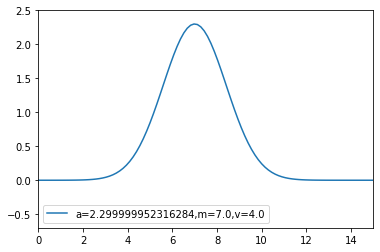

In [115]:
#Problem C3: Model guessing based on visual inspection
#(a)

def model_bell_curve (x,w):
  a = w[0]
  m = w[1]
  v = w[2]
  fx = a*torch.exp(-(torch.pow(x-m,2))/v)
  return fx

#create a tensor with the values we want to evaluate
xt = torch.linspace(start=0, end=15, steps=100)

w1 = torch.tensor([2.3,7.0,4.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_bell_curve(xt,w1)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a={w1[0]},m={w1[1]},\
v={w1[2]}')
plt.legend()
plt.xlim(0,15)
plt.ylim(-0.7,2.5)

print(f"The guessed model is the bell_curve model and the associated parameters\
\n are a ={w1[0]}, m= {w1[1]} and v={w1[2]}")

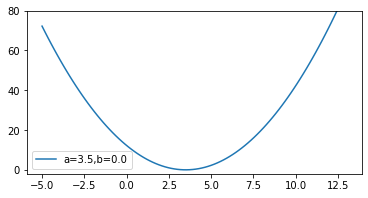

In [116]:
#model 2
#(b)

def model_quadratic (x,w):
  a = w[0]
  b = w[1]
  fx = torch.pow(x-a,2)+b
  return fx

#create a tensor with the values we want to evaluate
xt = torch.linspace(start=-5, end=13, steps=100)

w1 = torch.tensor([3.5,0.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_quadratic(xt,w1)


#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a={w1[0]},b={w1[1]}')
plt.legend()
plt.ylim(-2,80)
fig = plt.gcf()
fig.set_size_inches(6, 3)


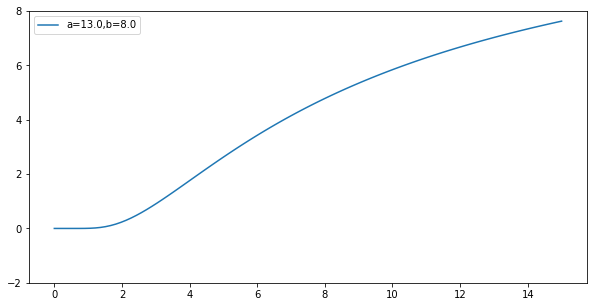

In [117]:
#model 4
#(c)

def model_arrhenius (x,w):
  a = w[0]
  b = w[1]
  fx = a*torch.exp(-b/x)
  return fx

#create a tensor with the values we want to evaluate
xt = torch.linspace(start=0, end=15, steps=100)

w1 = torch.tensor([13.0,8.0], requires_grad=True)

#compute the predicted y values with five different alternatives of parameter values
y_pred1 = model_arrhenius(xt,w1)

#plotting
line1, = plt.plot(xt, y_pred1.detach().numpy(), label=f'a={w1[0]},b={w1[1]}')
plt.legend()
plt.ylim(-2,8)
fig = plt.gcf()
fig.set_size_inches(10, 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


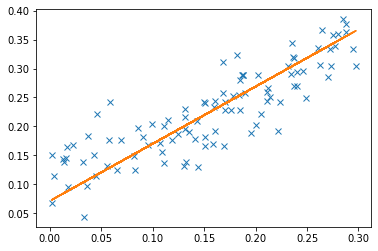

The optimal parameters for this model are a = 0.9894237518310547 and b = 0.07098470628261566
The final value of the cost function is J = 0.0017758269466304323


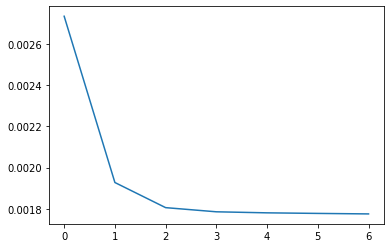

In [118]:
#Problem D1

#read data from csv file
data = genfromtxt('/content/dataset_SteelAI.csv', delimiter=',', skip_header=1)

#create tensors for X & Y data 
X = torch.tensor(data[:, 0], requires_grad=False)
y_true = torch.tensor(data[:,1], requires_grad=False)

#plot the X & Y data 
# plt.plot(X,y_true,'x')

#since the data appears to have a linear relationship, we decided to use 
#a linear parametric model
def model(x,a,b):
  fx = a*x+b
  return fx

#LOSS FUNCTION: Define your loss function
#we choose to use L2 (the sum of squared errors)
def loss_function(y_pred, y_true):
  loss_value = torch.pow(y_true-y_pred, 2.0)
  return loss_value

#COST FUNCTION: Define your cost function
def cost_function(y_pred, y_true):
  cost_value = torch.mean(loss_function(y_pred, y_true))
  return cost_value

#INITIALIZATION
#choose initial values for a & b parameters
a = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.10, requires_grad=True)

#maximum number of iterations
max_iterations = 1000
#learning rate
eta = 0.3
#empty array to store cost function values
cost_values=[]
#stopping criteria threshold
threshold = 1e-6

#Fitting- / Learning- / Training-loop
for iteration_i in range(max_iterations):
  #Predict from current model with current params
  y_preds = model(X,a,b)

  #Compute cost associated with current params
  cost = cost_function(y_preds, y_true)
  cost_values.append(cost.item())

  #Compute gradient of cost function for current params
  cost.backward()

  #Update params via Gradient Decent update
  with torch.no_grad():
    a -= eta*a.grad
    b -= eta*b.grad

  #breaking criteria
  if a.grad <= threshold or b.grad <= threshold:
    break

  #Reset gradients back to zero
  a.grad.zero_()
  b.grad.zero_()

#compute the predicted values of y based on the best estimated model parameters (a&b)
y_preds_final = model(X,a,b)
#convert it to a tensor that does not require grad
y_preds_final_tensor = torch.tensor(y_preds_final, requires_grad=False)

#plot the model
plt.plot(X,y_true,'x',X,y_preds_final_tensor)
plt.show()
#plot the cost function values 
plt.plot(cost_values)

print(f"The optimal parameters for this model are a = {a} and b = {b}")
print(f"The final value of the cost function is J = {cost}")

The optimal parameters for this model based on bootstrap sampling are a = 0.9902470707893372 and b = 0.06825973093509674


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


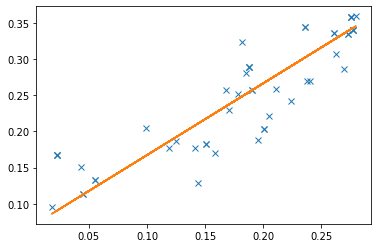

In [119]:
#Problem D1 continued 
#using bootstrap sampling

for i in range(1000):
  indices = np.random.choice(data.shape[0], 50, replace=True)
  data_bootstrap = data[indices]

  #create tensors for X & Y data 
  X = torch.tensor(data_bootstrap[:, 0], requires_grad=False)
  y_true = torch.tensor(data_bootstrap[:,1], requires_grad=False)

  #store the values of the parameters a&b in an empty vector
  a_values=[]
  b_values=[]

  #since the data appears to have a linear relationship, we decided to use 
  #a linear parametric model
  def model(x,a,b):
    fx = a*x+b
    return fx

  #LOSS FUNCTION: Define your loss function
  #we choose to use L2 (the sum of squared errors)
  def loss_function(y_pred, y_true):
    loss_value = torch.pow(y_true-y_pred, 2.0)
    return loss_value

  #COST FUNCTION: Define your cost function
  def cost_function(y_pred, y_true):
    cost_value = torch.mean(loss_function(y_pred, y_true))
    return cost_value

  #INITIALIZATION
  #choose initial values for a & b parameters
  a = torch.tensor(1.0, requires_grad=True)
  b = torch.tensor(0.10, requires_grad=True)

  #maximum number of iterations
  max_iterations = 1000
  #learning rate
  eta = 0.3
  #stopping criteria threshold
  threshold = 1e-6

  #Fitting- / Learning- / Training-loop
  for iteration_i in range(max_iterations):
    # Predict from current model with current params
    y_preds = model(X,a,b)

    #Compute cost associated with current params
    cost = cost_function(y_preds, y_true)

    #Compute gradient of cost function for current params
    cost.backward()

    #Update params via Gradient Decent update
    with torch.no_grad():
      a -= eta*a.grad
      b -= eta*b.grad

    #breaking criteria
    if a.grad <= threshold or b.grad <= threshold:
      break

    #Reset gradients back to zero
    a.grad.zero_()
    b.grad.zero_()

  #append the optimal parameters values for each bootstrap sample to the vectors
  a_values.append(a.item())
  b_values.append(b.item())

#take the average of the parameters values from all bootstrap samples 
a = np.mean(a_values)
b = np.mean(b_values)

print(f"The optimal parameters for this model based on bootstrap sampling \
are a = {a} and b = {b}")

#compute the predicted values of y based on the best estimated model parameters (a&b)
y_preds_final = model(X,a,b)
#convert it to a tensor that does not require grad
y_preds_final_tensor = torch.tensor(y_preds_final, requires_grad=False)

#plot the model
plt.plot(X,y_true,'x',X,y_preds_final_tensor)



In [120]:
#Problem D2

(a) Based on the plot of the data, the two model types that can explain the relationship between the observed pairs (xn,yn) are:

1/Michaelis-Menten type model

2/Arrhenius type model


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


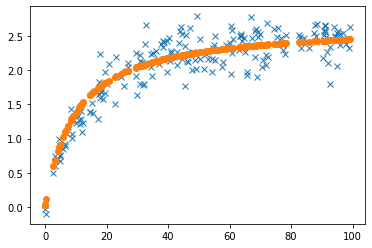

The optimal parameters for this model are a = 2.6779680252075195 and b = 9.339641571044922
The final value of the cost function is J = 0.04246683618458852


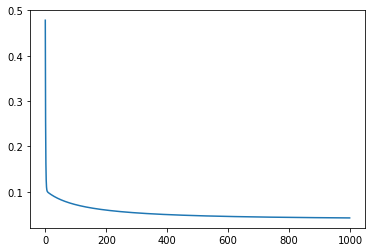

In [121]:
#using Michaelis-Menten type model

#read data from csv file
data = genfromtxt('/content/dataset_Marvin_Minsky.csv', delimiter=',', skip_header=1)

#create tensors for X & Y data 
X = torch.tensor(data[:, 0], requires_grad=False)
y_true = torch.tensor(data[:,1], requires_grad=False)

#plot the X & Y data 
#plt.plot(X,y_true,'x')

#MODEL: define your parametric model
def model(x,a,b):
  fx = (a*x)/(b+x)
  return fx

#LOSS FUNCTION: Define your loss function
#we choose to use L2 (the sum of squared errors)
def loss_function(y_pred, y_true):
  loss_value = torch.pow(y_true-y_pred, 2.0)
  return loss_value

#COST FUNCTION: Define your cost function
def cost_function(y_pred, y_true):
  cost_value = torch.mean(loss_function(y_pred, y_true))
  return cost_value

#INITIALIZATION
#choose initial values for a & b parameters
a = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)

#maximum number of iterations
max_iterations = 1000
#learning rate
eta = 1.0
#empty array to store cost function values
cost_values=[]
#stopping criteria threshold
threshold = 1e-6

#Fitting- / Learning- / Training-loop
for iteration_i in range(max_iterations):
  # Predict from current model with current params
  y_preds = model(X,a,b)

  #Compute cost associated with current params
  cost = cost_function(y_preds, y_true)
  cost_values.append(cost.item())

  #Compute gradient of cost function for current params
  cost.backward()

  #Update params via Gradient Decent update
  with torch.no_grad():
    a -= eta*a.grad
    b -= eta*b.grad
  #breaking criteria
  # if a.grad <= threshold or b.grad <= threshold:
  #   break

  #Reset gradients back to zero
  a.grad.zero_()
  b.grad.zero_()

#compute the predicted values of y based on the best estimated model parameters (a&b)
y_preds_final = model(X,a,b)
#convert it to a tensor that does not require grad
y_preds_final_tensor_model1 = torch.tensor(y_preds_final, requires_grad=False)

#plot the model
plt.plot(X,y_true,'x',X,y_preds_final_tensor_model1,'o')
plt.show()
print(f"The optimal parameters for this model are a = {a} and b = {b}")

#plot the cost function values 
plt.plot(cost_values)

print(f"The final value of the cost function is J = {cost}")

The optimal parameters for this model based on bootstrap sampling are a = 2.6186721324920654 and b = 7.997400283813477


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


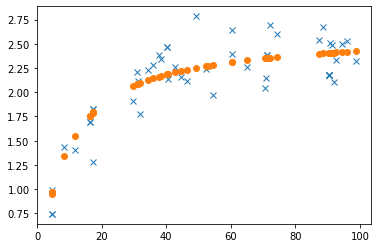

In [122]:
#bootstrap sampling with Michaelis-Menten type model

for i in range(1000):
  indices = np.random.choice(data.shape[0], 50, replace=True)
  data_bootstrap = data[indices]

  #create tensors for X & Y data 
  X = torch.tensor(data_bootstrap[:, 0], requires_grad=False)
  y_true = torch.tensor(data_bootstrap[:,1], requires_grad=False)

  #store the values of the parameters a&b in an empty vector
  a_values=[]
  b_values=[]


  #MODEL: define your parametric model
  def model(x,a,b):
    fx = (a*x)/(b+x)
    return fx

  #LOSS FUNCTION: Define your loss function
  #we choose to use L2 (the sum of squared errors)
  def loss_function(y_pred, y_true):
    loss_value = torch.pow(y_true-y_pred, 2.0)
    return loss_value

  #COST FUNCTION: Define your cost function
  def cost_function(y_pred, y_true):
    cost_value = torch.mean(loss_function(y_pred, y_true))
    return cost_value

  #INITIALIZATION
  #choose initial values for a & b parameters
  a = torch.tensor(3.0, requires_grad=True)
  b = torch.tensor(3.0, requires_grad=True)

  #maximum number of iterations
  max_iterations = 1000
  #learning rate
  eta = 1.0
  #stopping criteria threshold
  threshold = 1e-6

  #Fitting- / Learning- / Training-loop
  for iteration_i in range(max_iterations):
    # Predict from current model with current params
    y_preds = model(X,a,b)

    #Compute cost associated with current params
    cost = cost_function(y_preds, y_true)

    #Compute gradient of cost function for current params
    cost.backward()

    #Update params via Gradient Decent update
    with torch.no_grad():
      a -= eta*a.grad
      b -= eta*b.grad
    #breaking criteria
    # if a.grad <= threshold or b.grad <= threshold:
    #   break

    #Reset gradients back to zero
    a.grad.zero_()
    b.grad.zero_()

  #append the optimal parameters values for each bootstrap sample to the vectors
  a_values.append(a.item())
  b_values.append(b.item())

#take the average of the parameters values from all bootstrap samples 
a = np.mean(a_values)
b = np.mean(b_values)

print(f"The optimal parameters for this model based on bootstrap sampling \
are a = {a} and b = {b}")

#compute the predicted values of y based on the best estimated model parameters (a&b)
y_preds_final = model(X,a,b)
#convert it to a tensor that does not require grad
y_preds_final_tensor_model1_bootstrap = torch.tensor(y_preds_final, requires_grad=False)
#plot the model
plt.plot(X,y_true,'x',X,y_preds_final_tensor_model1_bootstrap,'o')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


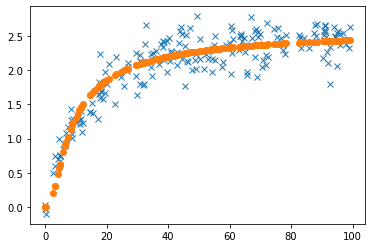

The optimal parameters for this model are a = 2.6079366207122803 and b = 6.8572611808776855
The final value of the cost function is J = 0.04330182960195371


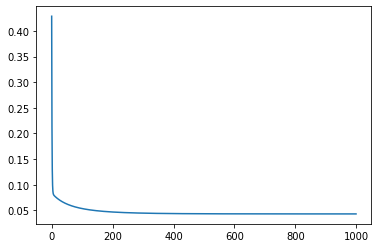

In [123]:
#using Arrhenius type model

#read data from csv file
data = genfromtxt('/content/dataset_Marvin_Minsky.csv', delimiter=',', skip_header=1)

#create tensors for X & Y data 
X = torch.tensor(data[:, 0], requires_grad=False)
y_true = torch.tensor(data[:,1], requires_grad=False)

#plot the X & Y data 
#plt.plot(X,y_true,'x')

#MODEL: define your parametric model
def model_arrhenius (x,a,b):
  fx = a*torch.exp(-b/x)
  return fx

#LOSS FUNCTION: Define your loss function
#we choose to use L2 (the sum of squared errors)
def loss_function(y_pred, y_true):
  loss_value = torch.pow(y_true-y_pred, 2.0)
  return loss_value

#COST FUNCTION: Define your cost function
def cost_function(y_pred, y_true):
  cost_value = torch.mean(loss_function(y_pred, y_true))
  return cost_value

#INITIALIZATION
#choose initial values for a & b parameters
a = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)

#maximum number of iterations
max_iterations = 1000
#learning rate
eta = 1.0
#empty array to store cost function values
cost_values=[]
#stopping criteria threshold
threshold = 1e-6

#Fitting- / Learning- / Training-loop
for iteration_i in range(max_iterations):
  # Predict from current model with current params
  y_preds = model_arrhenius(X,a,b)

  #Compute cost associated with current params
  cost = cost_function(y_preds, y_true)
  cost_values.append(cost.item())

  #Compute gradient of cost function for current params
  cost.backward()

  #Update params via Gradient Decent update
  with torch.no_grad():
    a -= eta*a.grad
    b -= eta*b.grad
  #breaking criteria
  # if a.grad <= threshold or b.grad <= threshold:
  #   break

  #Reset gradients back to zero
  a.grad.zero_()
  b.grad.zero_()

#compute the predicted values of y based on the best estimated model parameters (a&b)
y_preds_final = model_arrhenius(X,a,b)
#convert it to a tensor that does not require grad
y_preds_final_tensor_model2 = torch.tensor(y_preds_final, requires_grad=False)

#plot the model
plt.plot(X,y_true,'x',X,y_preds_final_tensor_model2,'o')
plt.show()
print(f"The optimal parameters for this model are a = {a} and b = {b}")

#plot the cost function values 
plt.plot(cost_values)

print(f"The final value of the cost function is J = {cost}")


The optimal parameters for this model based on bootstrap sampling are a = 2.627540349960327 and b = 7.742626190185547


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


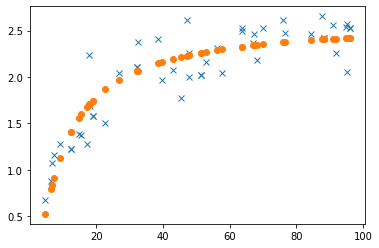

In [124]:
#bootstrap sampling with Arrhenius type model

for i in range(1000):
  indices = np.random.choice(data.shape[0], 50, replace=True)
  data_bootstrap = data[indices]

  #create tensors for X & Y data 
  X = torch.tensor(data_bootstrap[:, 0], requires_grad=False)
  y_true = torch.tensor(data_bootstrap[:,1], requires_grad=False)

  #store the values of the parameters a&b in an empty vector
  a_values=[]
  b_values=[]

  #MODEL: define your parametric model
  def model_arrhenius (x,a,b):
    fx = a*torch.exp(-b/x)
    return fx

  #LOSS FUNCTION: Define your loss function
  #we choose to use L2 (the sum of squared errors)
  def loss_function(y_pred, y_true):
    loss_value = torch.pow(y_true-y_pred, 2.0)
    return loss_value

  #COST FUNCTION: Define your cost function
  def cost_function(y_pred, y_true):
    cost_value = torch.mean(loss_function(y_pred, y_true))
    return cost_value

  #INITIALIZATION
  #choose initial values for a & b parameters
  a = torch.tensor(3.0, requires_grad=True)
  b = torch.tensor(3.0, requires_grad=True)

  #maximum number of iterations
  max_iterations = 1000
  #learning rate
  eta = 1.0
  #stopping criteria threshold
  threshold = 1e-6

  #Fitting- / Learning- / Training-loop
  for iteration_i in range(max_iterations):
    # Predict from current model with current params
    y_preds = model_arrhenius(X,a,b)

    #Compute cost associated with current params
    cost = cost_function(y_preds, y_true)

    #Compute gradient of cost function for current params
    cost.backward()

    #Update params via Gradient Decent update
    with torch.no_grad():
      a -= eta*a.grad
      b -= eta*b.grad
    #breaking criteria
    # if a.grad <= threshold or b.grad <= threshold:
    #   break

    #Reset gradients back to zero
    a.grad.zero_()
    b.grad.zero_()

  #append the optimal parameters values for each bootstrap sample to the vectors
  a_values.append(a.item())
  b_values.append(b.item())

#take the average of the parameters values from all bootstrap samples 
a = np.mean(a_values)
b = np.mean(b_values)

print(f"The optimal parameters for this model based on bootstrap sampling \
are a = {a} and b = {b}")

#compute the predicted values of y based on the best estimated model parameters (a&b)
y_preds_final = model_arrhenius(X,a,b)
#convert it to a tensor that does not require grad
y_preds_final_tensor_model2_bootstrap = torch.tensor(y_preds_final, requires_grad=False)

#plot the model
plt.plot(X,y_true,'x',X,y_preds_final_tensor_model2_bootstrap,'o')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


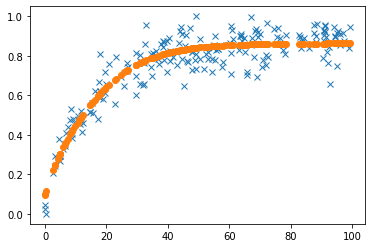

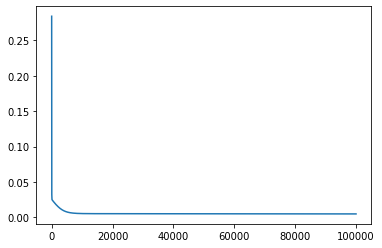

[0.2842227824464125, 0.25397306548551607, 0.22707685718794718, 0.20313894720821912, 0.18180600854217793, 0.16276041961566753, 0.1457145370100709, 0.13040462490227392, 0.11658414148992964, 0.1040163783593227, 0.09246640581303518, 0.08169636704855553, 0.07148435019889426, 0.06174656466764983, 0.05297481415373994, 0.04680895167758639, 0.044250481862570475, 0.04338454840775423, 0.042780539288748684, 0.042209468257045996, 0.04165444008408748, 0.04111416412620894, 0.04058829046251245, 0.040076520892886915, 0.039578560056387956, 0.03909411231760194, 0.038622877844448, 0.038164557115865874, 0.03771885473800844, 0.03728547811848741, 0.03686413870913513, 0.03645455446956273, 0.03605643962556494, 0.035669525339953385, 0.03529354323298261, 0.03492823084725074, 0.034573338643361116, 0.03422861915079431, 0.03389383142183404, 0.033568748416753114, 0.033253140230425804, 0.03294679617140186, 0.03264950370621945, 0.03236105615348748, 0.032081260915202976, 0.03180992845308885, 0.03154687385744496, 0.0312

In [125]:
#Problem D3

#read data from csv file
data = genfromtxt('/content/dataset_Marvin_Minsky.csv', delimiter=',', skip_header=1)

#rescale y_values to the interval [0,1]
y_normalized = (data[:,1] - np.min(data[:,1])) / (np.max(data[:,1]) - np.min(data[:,1]))

#create tensors for X & Y data 
X = torch.tensor(data[:, 0], requires_grad=False)
y_true = torch.tensor(y_normalized, requires_grad=False)

#plot the X & Y data 
plt.plot(X,y_true,'x')

#MODEL: define your parametric model
def sigmoid(x):
  fx = 1/(1+torch.exp(-x))
  return fx

def model(x,p):
  n1 = sigmoid(p[3]*x+p[5])
  n2 = sigmoid(p[4]*x+p[6])
  fx = p[0]*n1+p[1]*n2+p[2]
  return fx

#LOSS FUNCTION: Define your loss function
#we choose to use L2 (the sum of squared errors)
def loss_function(y_pred, y_true):
  loss_value = torch.pow(y_true-y_pred, 2.0)
  return loss_value

#COST FUNCTION: Define your cost function
def cost_function(y_pred, y_true):
  cost_value = torch.mean(loss_function(y_pred, y_true))
  return cost_value

#INITIALIZATION
p = torch.rand(7, requires_grad=True)

#maximum number of iterations
max_iterations = 100000
eta = 0.01
cost_values=[]

#Fitting- / Learning- / Training-loop
for iteration_i in range(max_iterations):
  # Predict from current model with current params
  y_preds = model(X,p)

  #Compute cost associated with current params
  cost = cost_function(y_preds, y_true)
  cost_values.append(cost.item())

  #Compute gradient of cost function for current params
  cost.backward()

  #Update params via Gradient Decent update
  with torch.no_grad():
    p -= eta*p.grad
  
  #Reset gradients back to zero
  p.grad.zero_()


#   # if # some stopping criteria fullfiled
#   # break

#compute the predicted values of y based on the best estimated model parameters (a&b)
y_preds_final = model(X,p)
#convert it to a tensor that does not require grad
y_preds_final_tensor = torch.tensor(y_preds_final, requires_grad=False)

# #plot the model
plt.plot(X,y_preds_final_tensor,'o')
plt.show()

m = np.arange(max_iterations)
plt.plot(m,cost_values)
plt.show()

print(cost_values)